In [84]:
import json
import numpy as np
from shapely.geometry import Polygon
import cv2
import matplotlib.pyplot as plt

In [73]:
json_loc = "/scratch/ichakr2s/bdd100k/data/labels/10k/ins_seg/polygons/"
yolov5_dir = '/scratch/ichakr2s/yolov5pytorch/'
train_dir = yolov5_dir + 'train/'
val_dir = yolov5_dir + 'val/'

In [10]:
with open(json_loc + 'ins_seg_train.json', 'r') as f:
    train_json = json.load(f)
with open(json_loc + 'ins_seg_val.json', 'r') as f:
    val_json = json.load(f)

In [76]:
category_bdd10 = []
for img in train_json:
  for properties in img['labels']:
    if properties['category'] not in category_bdd10:
      category_bdd10.append(properties['category'])

names = "'"

for cat in category_bdd10:
  names += cat + "', '" 
names

"'car', 'person', 'truck', 'bus', 'bicycle', 'rider', 'trailer', 'motorcycle', 'caravan', 'train', '"

(720, 1280)

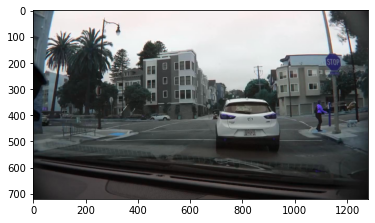

In [100]:
trname = train_json[0]['name']
img = cv2.imread(train_dir + 'images/' + trname)
plt.imshow(img)
img_height = img.shape[0]
img_width = img.shape[1]
img_height, img_width

In [78]:
with open(yolov5_dir + 'data.yaml', 'w') as f:
    f.write('train: ' + train_dir + 'images\n' + 'val: ' + val_dir + 'images\n\n' + 'nc: ' + str(len(category_bdd10)) + '\n' + 'names: [' + names[:-3] + ']')


In [64]:
cat_bdd_np = np.array(category_bdd10, dtype=np.str_)
n_cat = train_json[0]['labels'][0]['category']
category_bdd10.index("caravan")

8

In [103]:
for train_img in train_json:
    strinG = ''
    img_name = train_img['name'][:-3]
    for label in train_img['labels']:
        poly = Polygon(label['poly2d'][0]['vertices'])
        cat = category_bdd10.index(label['category'])
        centr_xy =  poly.centroid.xy
        centr_x = centr_xy[0][0]/img_width
        centr_y = centr_xy[1][0]/img_height
        minx, miny, maxx, maxy = poly.bounds
        width, height = (maxx - minx)/img_width, (maxy - miny)/img_height
        if height > 1.0:
            height = 0.999999
        if width > 1.0:
            width = 0.999999
        if centr_x > 1.0:
            centr_x = 0.999999
        if centr_y > 1.0:
            centr_y = 0.999999
        strinG += str(cat) + ' ' + str(centr_x) + ' ' + str(centr_y) + ' ' + str(width) + ' ' + str(height)  + '\n'

    with open(train_dir + 'labels/' + img_name + 'txt' , 'w') as f:
        f.write(strinG)



In [104]:
for val_img in val_json:
    strinG = ''
    img_name = val_img['name'][:-3]
    for label in val_img['labels']:
        poly = Polygon(label['poly2d'][0]['vertices'])
        cat = category_bdd10.index(label['category'])
        centr_xy =  poly.centroid.xy
        centr_x = centr_xy[0][0]/img_width
        centr_y = centr_xy[1][0]/img_height
        minx, miny, maxx, maxy = poly.bounds
        width, height = (maxx - minx)/img_width, (maxy - miny)/img_height
        if height > 1.0:
            height = 0.999999
        if width > 1.0:
            width = 0.999999
        if centr_x > 1.0:
            centr_x = 0.999999
        if centr_y > 1.0:
            centr_y = 0.999999
        strinG += str(cat) + ' ' + str(centr_x) + ' ' + str(centr_y) + ' ' + str(width) + ' ' + str(height)  + '\n'

    with open(val_dir + 'labels/' + img_name + 'txt' , 'w') as f:
        f.write(strinG)

In [68]:
train_json[0]['name'][:-3]

'6b73ccdd-00000000.'

In [44]:
P = Polygon(train_json[0]['labels'][0]['poly2d'][0]['vertices'])
minx, miny, maxx, maxy = P.bounds
width, height = maxx - minx, maxy - miny
train_json[0]['labels'][0]['poly2d'][0]['vertices']
centroid = P.centroid.xy
cen_x = centroid[0][0]
cen_y = centroid[1][0]
cen_x, cen_y


(490.2443964410771, 407.27865691983715)

In [13]:
for img in train_json:
    for lab in img['labels']:
        for xyz in lab[poly]
        

1000